Install some libraries. Usage notes:
  * These need to be `uv add`ed
  * Then you need to either source into the venv or `uv run` them
  * `uvx` didn't work, so there's more to learn about tooling

In [3]:
# Cell 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Polygon
import pandas as pd

# Set style for prettier plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
# Cell 2: Function to generate Pascal's triangle
def generate_pascals_triangle(n_rows):
    """
    Generate the first n rows of Pascal's triangle
    Returns a list of lists, where each inner list is a row
    """
    triangle = []
    
    for i in range(n_rows):
        row = []
        for j in range(i + 1):
            if j == 0 or j == i:
                # First and last elements are always 1
                row.append(1)
            else:
                # Each element is sum of two elements above it
                row.append(triangle[i-1][j-1] + triangle[i-1][j])
        triangle.append(row)
    
    return triangle

In [17]:
# Cell 3: Generate triangle and display basic version
n_rows = 15
triangle = generate_pascals_triangle(n_rows)

print("Pascal's Triangle (first {} rows):".format(n_rows))
print("-" * 40)

for i, row in enumerate(triangle):
    # Center the row with spaces
    spaces = " " * (n_rows - i) * 2
    row_str = "  ".join(f"{num:3}" for num in row)
    print(f"{spaces}{row_str}")

Pascal's Triangle (first 15 rows):
----------------------------------------
                                1
                              1    1
                            1    2    1
                          1    3    3    1
                        1    4    6    4    1
                      1    5   10   10    5    1
                    1    6   15   20   15    6    1
                  1    7   21   35   35   21    7    1
                1    8   28   56   70   56   28    8    1
              1    9   36   84  126  126   84   36    9    1
            1   10   45  120  210  252  210  120   45   10    1
          1   11   55  165  330  462  462  330  165   55   11    1
        1   12   66  220  495  792  924  792  495  220   66   12    1
      1   13   78  286  715  1287  1716  1716  1287  715  286   78   13    1
    1   14   91  364  1001  2002  3003  3432  3003  2002  1001  364   91   14    1


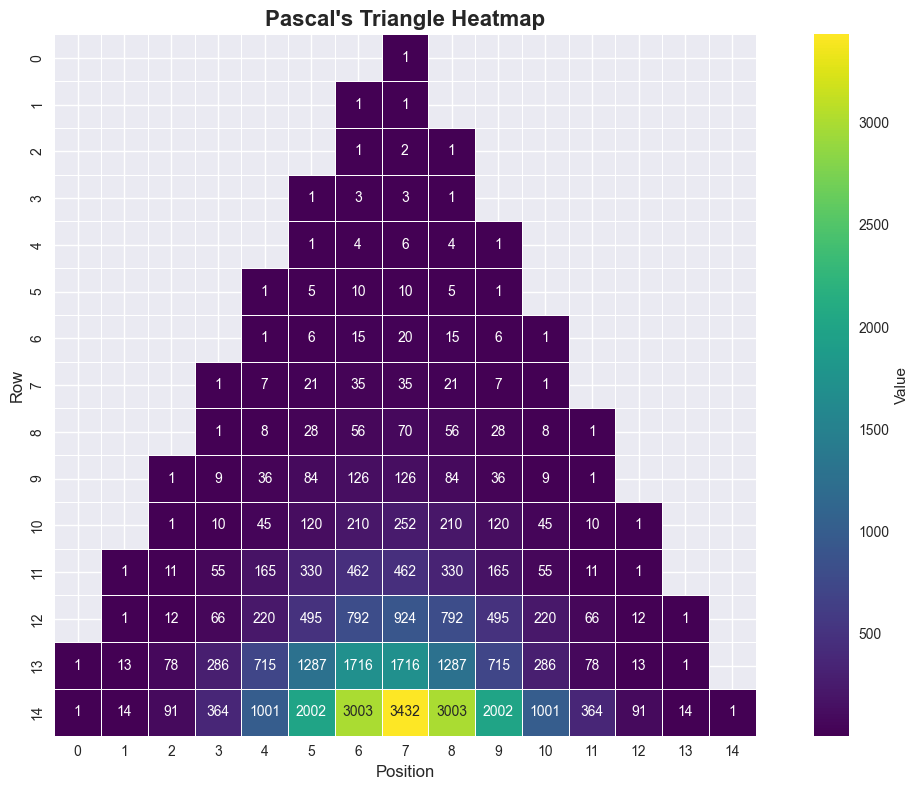

In [18]:
# Cell 4: Create a heatmap visualization
def create_heatmap(triangle, title="Pascal's Triangle Heatmap"):
    """Create a heatmap visualization of Pascal's triangle"""
    
    # Create a matrix filled with zeros
    max_len = len(triangle[-1])
    matrix = np.zeros((len(triangle), max_len))
    
    # Fill the matrix with triangle values
    for i, row in enumerate(triangle):
        start_idx = (max_len - len(row)) // 2
        for j, val in enumerate(row):
            matrix[i][start_idx + j] = val
    
    # Replace zeros with NaN for better visualization
    matrix[matrix == 0] = np.nan
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(matrix, annot=True, fmt='.0f', cmap='viridis', 
                cbar_kws={'label': 'Value'}, square=True,
                linewidths=0.5, linecolor='white')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Position', fontsize=12)
    plt.ylabel('Row', fontsize=12)
    plt.tight_layout()
    plt.show()

# Create heatmap for our triangle
create_heatmap(triangle)

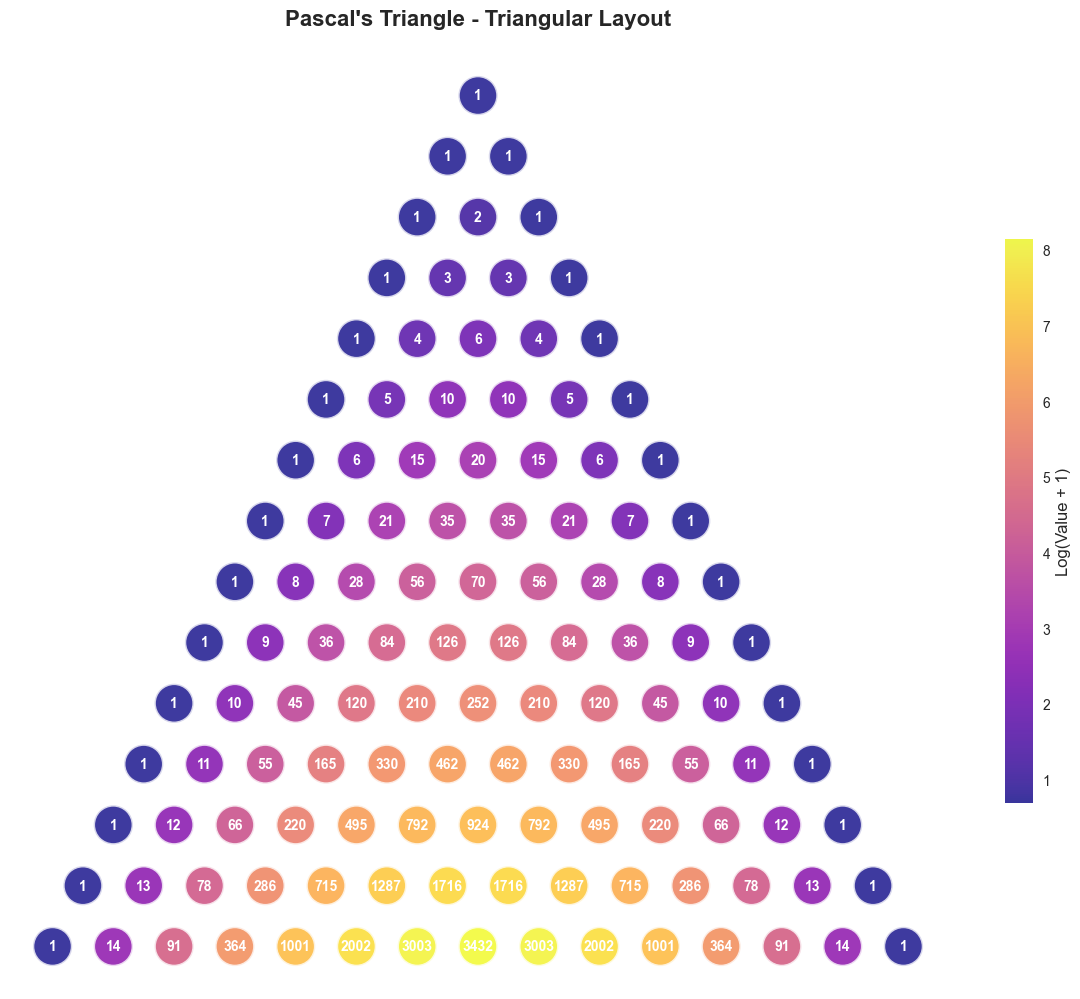

In [19]:
# Cell 5: Create a triangular scatter plot
def create_triangle_plot(triangle, title="Pascal's Triangle - Triangular Layout"):
    """Create a triangular scatter plot of Pascal's triangle"""
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Calculate positions for each number
    positions = []
    values = []
    colors = []
    
    for i, row in enumerate(triangle):
        for j, val in enumerate(row):
            # Calculate x position (centered)
            x = j - len(row)/2 + 0.5
            # Calculate y position (inverted so it looks like a triangle)
            y = -i
            
            positions.append((x, y))
            values.append(val)
            colors.append(np.log(val + 1))  # Log scale for color variation
    
    # Extract x and y coordinates
    x_coords = [pos[0] for pos in positions]
    y_coords = [pos[1] for pos in positions]
    
    # Create scatter plot
    scatter = ax.scatter(x_coords, y_coords, c=colors, s=800, 
                        cmap='plasma', alpha=0.8, edgecolors='white', linewidth=2)
    
    # Add value labels
    for i, (x, y, val) in enumerate(zip(x_coords, y_coords, values)):
        ax.annotate(str(val), (x, y), ha='center', va='center', 
                   fontweight='bold', fontsize=10, color='white')
    
    # Customize the plot
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.axis('off')  # Remove axes for cleaner look
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
    cbar.set_label('Log(Value + 1)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Create triangular plot
create_triangle_plot(triangle)

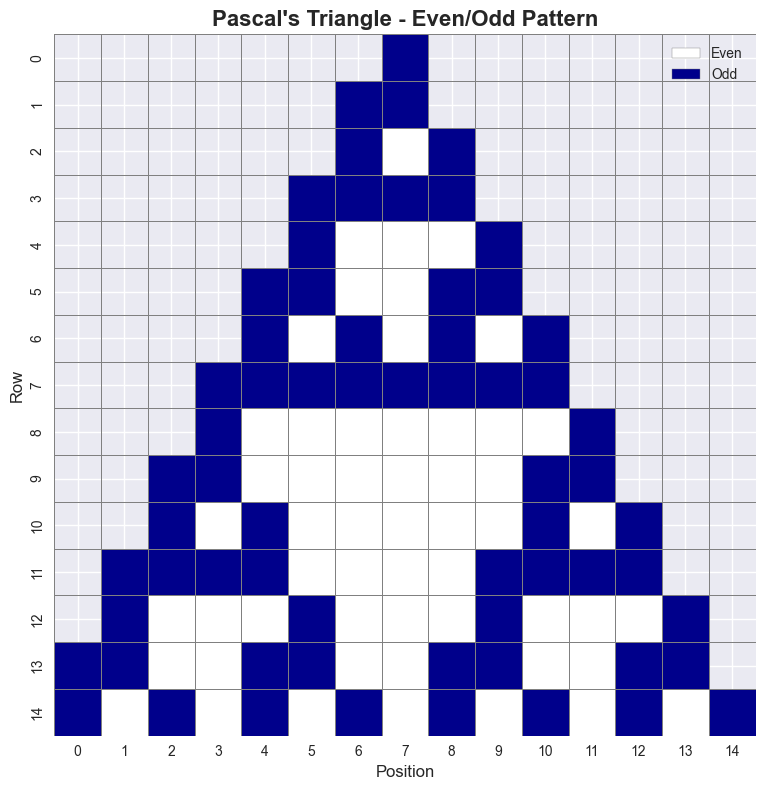

In [20]:
# Cell 6: Explore patterns - Even/Odd visualization
def visualize_even_odd_pattern(triangle, title="Pascal's Triangle - Even/Odd Pattern"):
    """Visualize the even/odd pattern in Pascal's triangle"""
    
    # Create binary matrix (1 for odd, 0 for even)
    max_len = len(triangle[-1])
    matrix = np.zeros((len(triangle), max_len))
    
    for i, row in enumerate(triangle):
        start_idx = (max_len - len(row)) // 2
        for j, val in enumerate(row):
            matrix[i][start_idx + j] = val % 2
    
    # Replace zeros in empty positions with NaN
    for i in range(len(triangle)):
        row_len = len(triangle[i])
        start_idx = (max_len - row_len) // 2
        for j in range(max_len):
            if j < start_idx or j >= start_idx + row_len:
                matrix[i][j] = np.nan
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    colors = ['white', 'darkblue']  # Even = white, Odd = dark blue
    sns.heatmap(matrix, cmap=colors, cbar=False, square=True,
                linewidths=0.5, linecolor='gray', annot=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Position', fontsize=12)
    plt.ylabel('Row', fontsize=12)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='white', edgecolor='gray', label='Even'),
                      Patch(facecolor='darkblue', edgecolor='gray', label='Odd')]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

# Visualize even/odd pattern
visualize_even_odd_pattern(triangle)

In [10]:
# Cell 7: Interactive exploration function
def explore_triangle(n_rows_custom):
    """
    Function to generate and display Pascal's triangle with custom number of rows
    """
    if n_rows_custom <= 0:
        print("Please enter a positive number of rows.")
        return
    
    if n_rows_custom > 20:
        print("Warning: Large triangles may be hard to read. Consider using <= 20 rows.")
    
    triangle_custom = generate_pascals_triangle(n_rows_custom)
    
    print(f"\nPascal's Triangle with {n_rows_custom} rows:")
    print("=" * 50)
    
    for i, row in enumerate(triangle_custom):
        spaces = " " * (n_rows_custom - i) * 2
        row_str = "  ".join(f"{num:4}" for num in row)
        print(f"{spaces}{row_str}")
    
    # Show sum of each row (powers of 2)
    print(f"\nRow sums (powers of 2):")
    for i, row in enumerate(triangle_custom):
        print(f"Row {i}: {sum(row)} = 2^{i}")

# Cell 8: Try different sizes
print("Exploring different triangle sizes:")
print("\n" + "="*60)

# Try a small triangle
explore_triangle(10)

Exploring different triangle sizes:


Pascal's Triangle with 10 rows:
                       1
                     1     1
                   1     2     1
                 1     3     3     1
               1     4     6     4     1
             1     5    10    10     5     1
           1     6    15    20    15     6     1
         1     7    21    35    35    21     7     1
       1     8    28    56    70    56    28     8     1
     1     9    36    84   126   126    84    36     9     1

Row sums (powers of 2):
Row 0: 1 = 2^0
Row 1: 2 = 2^1
Row 2: 4 = 2^2
Row 3: 8 = 2^3
Row 4: 16 = 2^4
Row 5: 32 = 2^5
Row 6: 64 = 2^6
Row 7: 128 = 2^7
Row 8: 256 = 2^8
Row 9: 512 = 2^9


In [11]:
# Cell 9: Mathematical properties exploration
def explore_properties(triangle):
    """Explore mathematical properties of Pascal's triangle"""
    
    print("Mathematical Properties of Pascal's Triangle:")
    print("=" * 50)
    
    # Row sums
    print("\n1. Row Sums (Powers of 2):")
    for i, row in enumerate(triangle[:8]):  # Show first 8 rows
        print(f"   Row {i}: sum = {sum(row)} = 2^{i}")
    
    # Fibonacci sequence in diagonals
    print("\n2. Fibonacci Sequence in Diagonal Sums:")
    fibonacci_sums = []
    for i in range(len(triangle)):
        diagonal_sum = 0
        row, col = i, 0
        while row >= 0 and col < len(triangle[row]):
            diagonal_sum += triangle[row][col]
            row -= 1
            col += 1
        fibonacci_sums.append(diagonal_sum)
        if i < 10:  # Show first 10
            print(f"   Diagonal {i}: {diagonal_sum}")
    
    # Hockey stick pattern
    print("\n3. Hockey Stick Pattern Examples:")
    if len(triangle) >= 6:
        # Sum of first n numbers in a diagonal
        print(f"   1 + 1 = {triangle[2][1]} (appears in row 2, position 1)")
        print(f"   1 + 2 + 1 = {triangle[3][2]} (appears in row 3, position 2)")
        print(f"   1 + 3 + 3 + 1 = {triangle[4][3]} (appears in row 4, position 3)")

# Explore properties
explore_properties(triangle)


Mathematical Properties of Pascal's Triangle:

1. Row Sums (Powers of 2):
   Row 0: sum = 1 = 2^0
   Row 1: sum = 2 = 2^1
   Row 2: sum = 4 = 2^2
   Row 3: sum = 8 = 2^3
   Row 4: sum = 16 = 2^4
   Row 5: sum = 32 = 2^5
   Row 6: sum = 64 = 2^6
   Row 7: sum = 128 = 2^7

2. Fibonacci Sequence in Diagonal Sums:
   Diagonal 0: 1
   Diagonal 1: 1
   Diagonal 2: 2
   Diagonal 3: 3
   Diagonal 4: 5
   Diagonal 5: 8
   Diagonal 6: 13
   Diagonal 7: 21
   Diagonal 8: 34
   Diagonal 9: 55

3. Hockey Stick Pattern Examples:
   1 + 1 = 2 (appears in row 2, position 1)
   1 + 2 + 1 = 3 (appears in row 3, position 2)
   1 + 3 + 3 + 1 = 4 (appears in row 4, position 3)


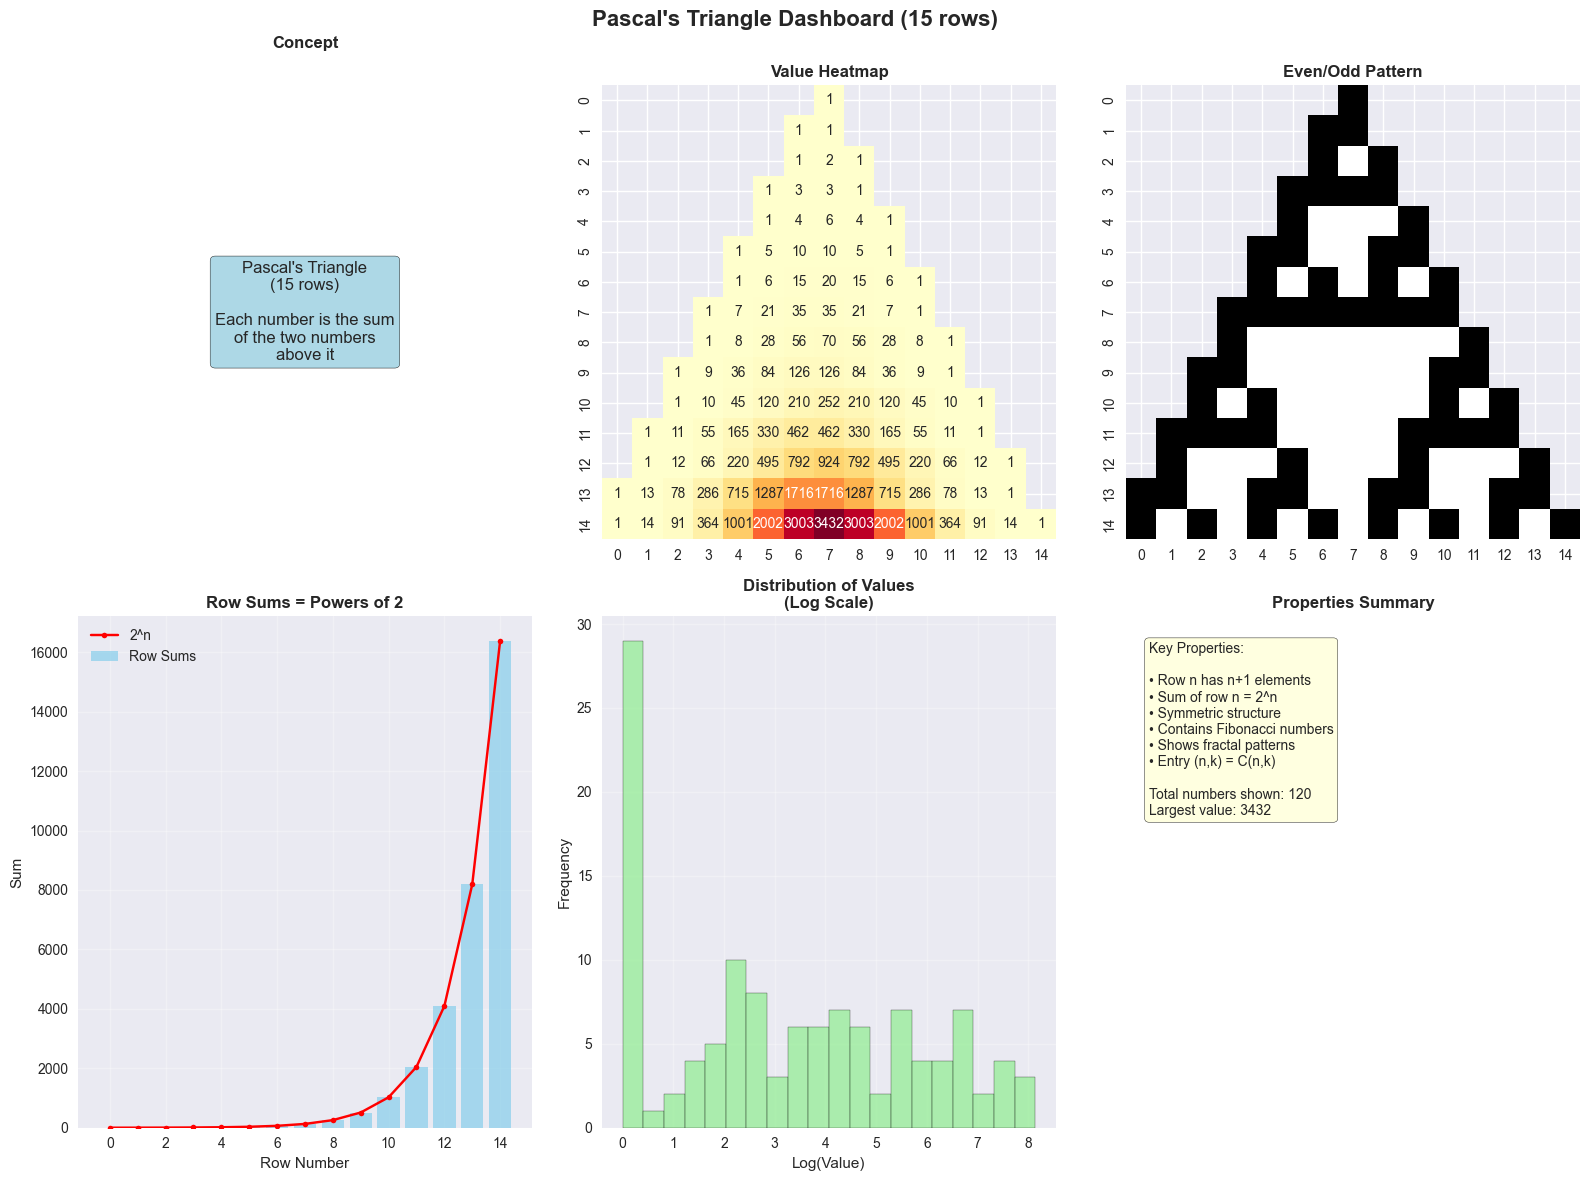

In [ ]:
# Cell 10: Create a comprehensive dashboard
def create_dashboard(n_rows=12):
    """Create a comprehensive dashboard of Pascal's triangle visualizations"""
    
    triangle = generate_pascals_triangle(n_rows)
    
    fig = plt.figure(figsize=(16, 12))
    
    # Subplot 1: Basic triangle (text)
    ax1 = plt.subplot(2, 3, 1)
    ax1.text(0.5, 0.5, f"Pascal's Triangle\n({n_rows} rows)\n\nEach number is the sum\nof the two numbers\nabove it", 
             ha='center', va='center', fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.axis('off')
    ax1.set_title('Concept', fontweight='bold')
    
    # Subplot 2: Heatmap
    ax2 = plt.subplot(2, 3, 2)
    max_len = len(triangle[-1])
    matrix = np.zeros((len(triangle), max_len))
    
    for i, row in enumerate(triangle):
        start_idx = (max_len - len(row)) // 2
        for j, val in enumerate(row):
            matrix[i][start_idx + j] = val
    
    matrix[matrix == 0] = np.nan
    sns.heatmap(matrix, annot=True, fmt='.0f', cmap='YlOrRd', 
                ax=ax2, cbar=False, square=True)
    ax2.set_title('Value Heatmap', fontweight='bold')
    
    # Subplot 3: Even/Odd pattern
    ax3 = plt.subplot(2, 3, 3)
    binary_matrix = matrix.copy()
    binary_matrix = np.where(np.isnan(binary_matrix), np.nan, binary_matrix % 2)
    
    sns.heatmap(binary_matrix, cmap=['white', 'black'], ax=ax3, 
                cbar=False, square=True)
    ax3.set_title('Even/Odd Pattern', fontweight='bold')
    
    # Subplot 4: Row sums
    ax4 = plt.subplot(2, 3, 4)
    row_sums = [sum(row) for row in triangle]
    powers_of_2 = [2**i for i in range(len(triangle))]
    
    x = range(len(row_sums))
    ax4.bar(x, row_sums, alpha=0.7, color='skyblue', label='Row Sums')
    ax4.plot(x, powers_of_2, 'ro-', label='2^n', markersize=4)
    ax4.set_xlabel('Row Number')
    ax4.set_ylabel('Sum')
    ax4.set_title('Row Sums = Powers of 2', fontweight='bold')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # Subplot 5: Value distribution
    ax5 = plt.subplot(2, 3, 5)
    all_values = [val for row in triangle for val in row]
    ax5.hist(np.log(all_values), bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    ax5.set_xlabel('Log(Value)')
    ax5.set_ylabel('Frequency')
    ax5.set_title('Distribution of Values\n(Log Scale)', fontweight='bold')
    ax5.grid(True, alpha=0.3)
    
    # Subplot 6: Properties summary
    ax6 = plt.subplot(2, 3, 6)
    properties_text = f"""Key Properties:

• Row n has n+1 elements
• Sum of row n = 2^n  
• Symmetric structure
• Contains Fibonacci numbers
• Shows fractal patterns
• Entry (n,k) = C(n,k)

Total numbers shown: {sum(len(row) for row in triangle)}
Largest value: {max(all_values)}"""
    
    ax6.text(0.05, 0.95, properties_text, ha='left', va='top', fontsize=10,
             transform=ax6.transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))
    ax6.axis('off')
    ax6.set_title('Properties Summary', fontweight='bold')
    
    plt.suptitle(f"Pascal's Triangle Dashboard ({n_rows} rows)", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Create the dashboard
create_dashboard(15)

